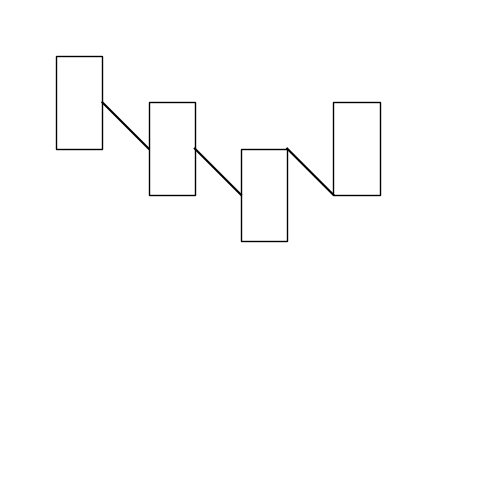

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw layers and connections
ax.add_patch(patches.Rectangle((0.1, 0.7), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Input layer
ax.add_patch(patches.Rectangle((0.3, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Generator
ax.add_patch(patches.Rectangle((0.5, 0.5), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Neuron
ax.add_patch(patches.Rectangle((0.7, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Output layer

# Draw connections between layers
plt.plot([0.2, 0.3], [0.8, 0.7], color='black')  # Connection from Input to Spike Generator
plt.plot([0.4, 0.5], [0.7, 0.6], color='black')  # Connection from Spike Generator to Spike Neuron
plt.plot([0.6, 0.7], [0.7, 0.6], color='black')  # Connection from Spike Neuron to Output

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

# Show the plot
plt.show()

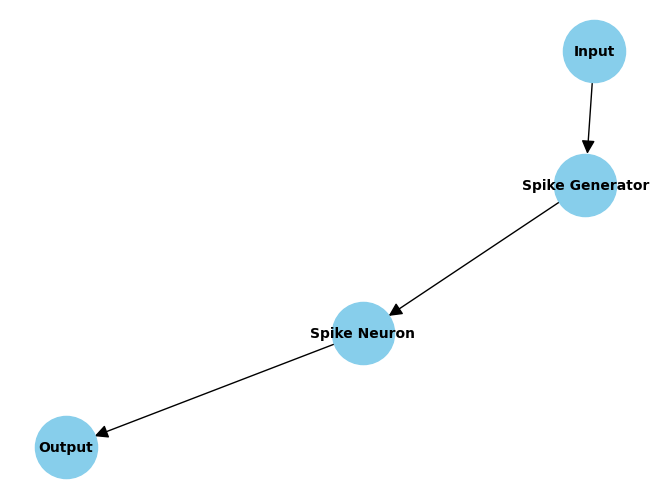

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to represent the SNN architecture
G.add_nodes_from(["Input", "Spike Generator", "Spike Neuron", "Output"])
G.add_edges_from([("Input", "Spike Generator"), ("Spike Generator", "Spike Neuron"), ("Spike Neuron", "Output")])

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
plt.show()


In [3]:
pip install pytorch_spiking

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import pytorch_spiking
import torchvision
torch.manual_seed(0)
np.random.seed(0)

In [ ]:
class SelfAttention(torch.nn.Module):
    def __init__(self, input_dim):
        super(SelfAttention, self).__init__()
        self.query = torch.nn.Linear(input_dim, input_dim)
        self.key = torch.nn.Linear(input_dim, input_dim)
        self.value = torch.nn.Linear(input_dim, input_dim)

    def forward(self, x):
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        attn_weights = torch.nn.functional.softmax(q @ k.transpose(-2, -1), dim=-1)
        return attn_weights @ v

In [ ]:

model = torch.nn.Sequential(
     torch.nn.Linear(784, 256),   #13 layers
     SelfAttention(256),
     torch.nn.SELU(),
    # set spiking_aware_training and a moderate dt
    pytorch_spiking.SpikingActivation(
        torch.nn.ELU(alpha=1.0), dt=0.5, spiking_aware_training=True #exponential linear unit
    ),
    torch.nn.Linear(256,128),
    SelfAttention(128),
    torch.nn.GELU(),
     torch.nn.Dropout(0.4),
       pytorch_spiking.SpikingActivation(
        torch.nn.ELU(alpha=1.0), dt=0.8, spiking_aware_training=True #exponential linear unit
    ),
    torch.nn.Linear(128,64),
    torch.nn.Dropout(0.4),
    pytorch_spiking.TemporalAvgPool(),
    torch.nn.Linear(64, 10),
)



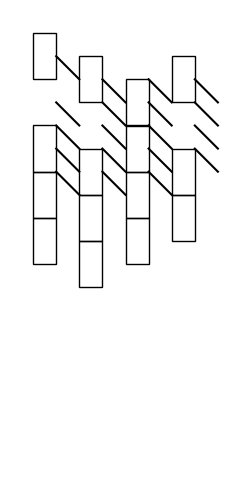

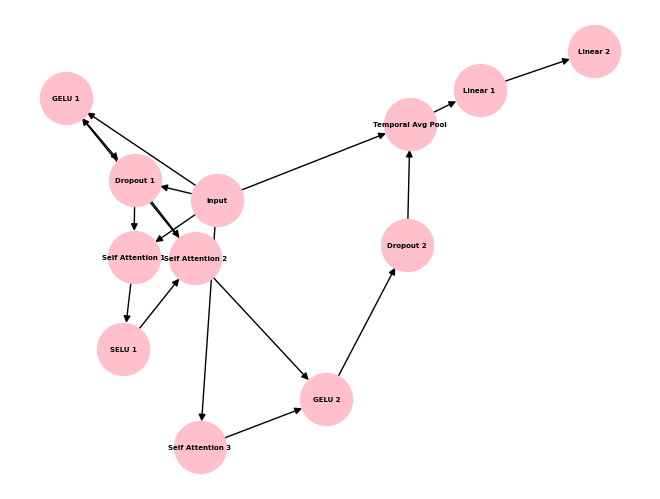

In [ ]:
# prompt: visualize the above model's architecture without using torchviz and dot


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw layers and connections
ax.add_patch(patches.Rectangle((0.1, 0.7), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Input layer
ax.add_patch(patches.Rectangle((0.3, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Generator
ax.add_patch(patches.Rectangle((0.5, 0.5), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Neuron
ax.add_patch(patches.Rectangle((0.7, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Output layer
ax.add_patch(patches.Rectangle((0.1, 0.3), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Self Attention 1
ax.add_patch(patches.Rectangle((0.3, 0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # SELU 1
ax.add_patch(patches.Rectangle((0.5, 0.3), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Self Attention 2
ax.add_patch(patches.Rectangle((0.7, 0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # GELU 1
ax.add_patch(patches.Rectangle((0.1, 0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout 1
ax.add_patch(patches.Rectangle((0.3, 0.0), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Self Attention 3
ax.add_patch(patches.Rectangle((0.5, 0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # GELU 2
ax.add_patch(patches.Rectangle((0.7, 0.0), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout 2
ax.add_patch(patches.Rectangle((0.1, -0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Temporal Avg Pool
ax.add_patch(patches.Rectangle((0.3, -0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Linear 1
ax.add_patch(patches.Rectangle((0.5, -0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Linear 2

# Draw connections between layers
plt.plot([0.2, 0.3], [0.8, 0.7], color='black')  # Connection from Input to Self Attention 1
plt.plot([0.4, 0.5], [0.7, 0.6], color='black')  # Connection from Self Attention 1 to SELU 1
plt.plot([0.6, 0.7], [0.7, 0.6], color='black')  # Connection from SELU 1 to Self Attention 2
plt.plot([0.8, 0.9], [0.7, 0.6], color='black')  # Connection from Self Attention 2 to GELU 1
plt.plot([0.2, 0.3], [0.6, 0.5], color='black')  # Connection from Input to Self Attention 3
plt.plot([0.4, 0.5], [0.6, 0.5], color='black')  # Connection from Self Attention 3 to GELU 2
plt.plot([0.6, 0.7], [0.6, 0.5], color='black')  # Connection from GELU 2 to Dropout 2
plt.plot([0.8, 0.9], [0.6, 0.5], color='black')  # Connection from Dropout 2 to Temporal Avg Pool
plt.plot([0.2, 0.3], [0.5, 0.4], color='black')  # Connection from Input to Dropout 1
plt.plot([0.4, 0.5], [0.5, 0.4], color='black')  # Connection from Dropout 1 to Self Attention 1
plt.plot([0.6, 0.7], [0.5, 0.4], color='black')  # Connection from Self Attention 1 to SELU 1
plt.plot([0.8, 0.9], [0.5, 0.4], color='black')  # Connection from SELU 1 to Self Attention 2
plt.plot([0.2, 0.3], [0.4, 0.3], color='black')  # Connection from Input to GELU 1
plt.plot([0.4, 0.5], [0.4, 0.3], color='black')  # Connection from GELU 1 to Dropout 1
plt.plot([0.6, 0.7], [0.4, 0.3], color='black')  # Connection from Dropout 1 to Self Attention 2
plt.plot([0.8, 0.9], [0.4, 0.3], color='black')  # Connection from Self Attention 2 to GELU 2
plt.plot([0.2, 0.3], [0.3, 0.2], color='black')  # Connection from Input to Temporal Avg Pool
plt.plot([0.4, 0.5], [0.3, 0.2], color='black')  # Connection from Temporal Avg Pool to Linear 1
plt.plot([0.6, 0.7], [0.3, 0.2], color='black')  # Connection from Linear 1 to Linear 2

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

# Show the plot
plt.show()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to represent the SNN architecture
G.add_nodes_from(["Input", "Self Attention 1", "SELU 1", "Self Attention 2", "GELU 1", "Dropout 1", "Self Attention 3", "GELU 2", "Dropout 2", "Temporal Avg Pool", "Linear 1", "Linear 2"])
G.add_edges_from([("Input", "Self Attention 1"), ("Self Attention 1", "SELU 1"), ("SELU 1", "Self Attention 2"), ("Self Attention 2", "GELU 1"), ("Input", "Self Attention 3"), ("Self Attention 3", "GELU 2"), ("GELU 2", "Dropout 2"), ("Dropout 2", "Temporal Avg Pool"), ("Input", "Dropout 1"), ("Dropout 1", "Self Attention 1"), ("Self Attention 1", "SELU 1"), ("SELU 1", "Self Attention 2"), ("Input", "GELU 1"), ("GELU 1", "Dropout 1"), ("Dropout 1", "Self Attention 2"), ("Self Attention 2", "GELU 2"), ("Input", "Temporal Avg Pool"), ("Temporal Avg Pool", "Linear 1"), ("Linear 1", "Linear 2")])

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=1400, node_color="pink", font_size=5, font_color="black", font_weight="bold", arrowsize=10)
plt.show()


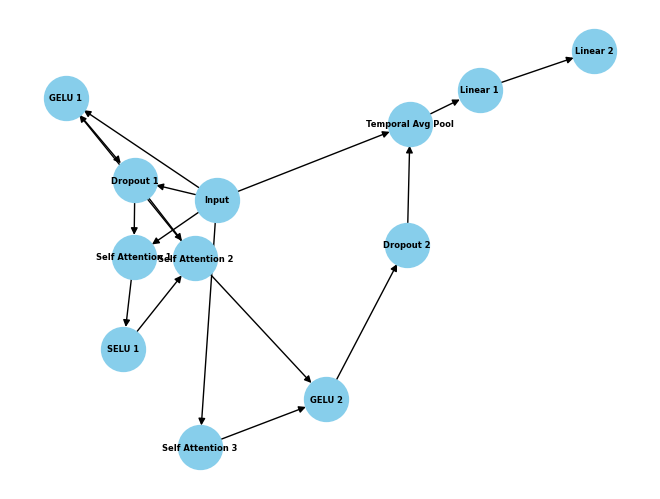

In [ ]:
# prompt: make the node figure larger

nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=6, font_color="black", font_weight="bold", arrowsize=10)
plt.show()


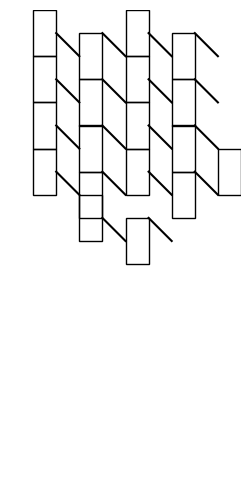

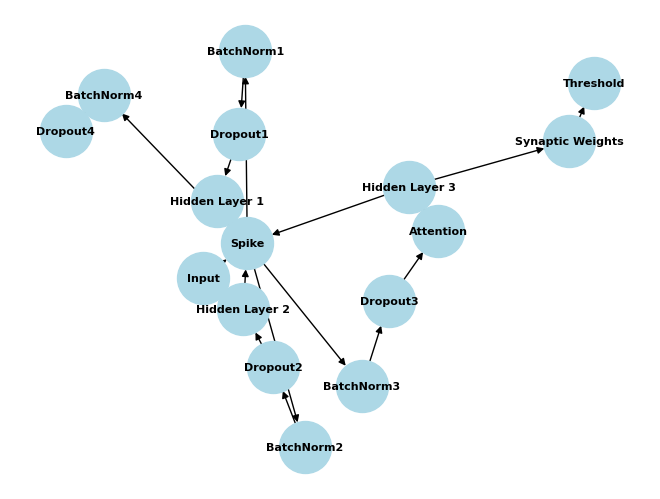

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw layers and connections
ax.add_patch(patches.Rectangle((0.1, 0.8), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Input layer
ax.add_patch(patches.Rectangle((0.3, 0.7), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike
ax.add_patch(patches.Rectangle((0.5, 0.8), 0.1, 0.2, edgecolor='black', facecolor='none'))  # BatchNorm1
ax.add_patch(patches.Rectangle((0.7, 0.7), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout1
ax.add_patch(patches.Rectangle((0.1, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Hidden Layer 1
ax.add_patch(patches.Rectangle((0.3, 0.5), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike
ax.add_patch(patches.Rectangle((0.5, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # BatchNorm2
ax.add_patch(patches.Rectangle((0.7, 0.5), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout2
ax.add_patch(patches.Rectangle((0.1, 0.4), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Hidden Layer 2
ax.add_patch(patches.Rectangle((0.3, 0.3), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike
ax.add_patch(patches.Rectangle((0.5, 0.4), 0.1, 0.2, edgecolor='black', facecolor='none'))  # BatchNorm3
ax.add_patch(patches.Rectangle((0.7, 0.3), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout3
ax.add_patch(patches.Rectangle((0.1, 0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Attention
ax.add_patch(patches.Rectangle((0.3, 0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Hidden Layer 3
ax.add_patch(patches.Rectangle((0.5, 0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike
ax.add_patch(patches.Rectangle((0.7, 0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # BatchNorm4
ax.add_patch(patches.Rectangle((0.9, 0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout4
ax.add_patch(patches.Rectangle((0.3, 0.0), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Synaptic Weights
ax.add_patch(patches.Rectangle((0.5, -0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Threshold

# Draw connections between layers
plt.plot([0.2, 0.3], [0.9, 0.8], color='black')  # Connection from Input to Spike
plt.plot([0.4, 0.5], [0.9, 0.8], color='black')  # Connection from Spike to BatchNorm1
plt.plot([0.6, 0.7], [0.9, 0.8], color='black')  # Connection from BatchNorm1 to Dropout1
plt.plot([0.8, 0.9], [0.9, 0.8], color='black')  # Connection from Dropout1 to Hidden Layer 1
plt.plot([0.2, 0.3], [0.7, 0.6], color='black')  # Connection from Hidden Layer 1 to Spike
plt.plot([0.4, 0.5], [0.7, 0.6], color='black')  # Connection from Spike to BatchNorm2
plt.plot([0.6, 0.7], [0.7, 0.6], color='black')  # Connection from BatchNorm2 to Dropout2
plt.plot([0.8, 0.9], [0.7, 0.6], color='black')  # Connection from Dropout2 to Hidden Layer 2
plt.plot([0.2, 0.3], [0.5, 0.4], color='black')  # Connection from Hidden Layer 2 to Spike
plt.plot([0.4, 0.5], [0.5, 0.4], color='black')  # Connection from Spike to BatchNorm3
plt.plot([0.6, 0.7], [0.5, 0.4], color='black')  # Connection from BatchNorm3 to Dropout3
plt.plot([0.8, 0.9], [0.5, 0.4], color='black')  # Connection from Dropout3 to Attention
plt.plot([0.2, 0.3], [0.3, 0.2], color='black')  # Connection from Attention to Hidden Layer 3
plt.plot([0.4, 0.5], [0.3, 0.2], color='black')  # Connection from Hidden Layer 3 to Spike
plt.plot([0.6, 0.7], [0.3, 0.2], color='black')  # Connection from Spike to BatchNorm4
plt.plot([0.8, 0.9], [0.3, 0.2], color='black')  # Connection from BatchNorm4 to Dropout4
plt.plot([0.4, 0.5], [0.1, 0.0], color='black')  # Connection from Hidden Layer 3 to Synaptic Weights
plt.plot([0.6, 0.7], [0.1, 0.0], color='black')  # Connection from Synaptic Weights to Threshold

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

# Show the plot
plt.show()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to represent the SNN architecture
G.add_nodes_from(["Input", "Spike", "BatchNorm1", "Dropout1", "Hidden Layer 1", "BatchNorm2", "Dropout2", "Hidden Layer 2", "BatchNorm3", "Dropout3", "Attention", "Hidden Layer 3", "BatchNorm4", "Dropout4", "Synaptic Weights", "Threshold"])
G.add_edges_from([("Input", "Spike"), ("Spike", "BatchNorm1"), ("BatchNorm1", "Dropout1"), ("Dropout1", "Hidden Layer 1"), ("Hidden Layer 1", "Spike"), ("Spike", "BatchNorm2"), ("BatchNorm2", "Dropout2"), ("Dropout2", "Hidden Layer 2"), ("Hidden Layer 2", "Spike"), ("Spike", "BatchNorm3"), ("BatchNorm3", "Dropout3"), ("Dropout3", "Attention"), ("Attention", "Hidden Layer 3"), ("Hidden Layer 3", "Spike"), ("Spike", "BatchNorm4"), ("BatchNorm4", "Dropout4"), ("Hidden Layer 3", "Synaptic Weights"), ("Synaptic Weights", "Threshold")])

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=1400, node_color="lightblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
plt.show()